In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


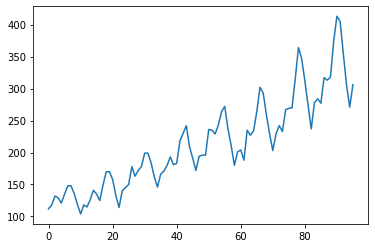

In [3]:
air = pd.read_excel("Airlines+Data.xlsx")
air.Passengers.plot() 
air

In [5]:
##splitting the data
Train = air.head(147)
Test = air.tail(12)

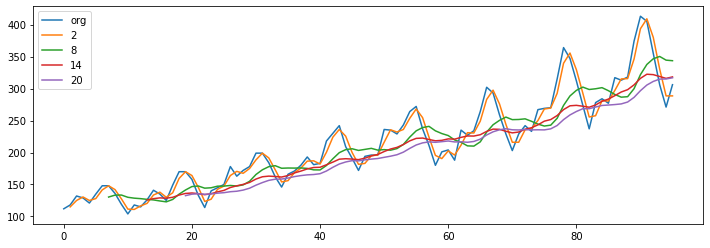

In [8]:
### Movinng average####

plt.figure(figsize=(12,4))
air.Passengers.plot(label="org")
for i in range(2,24,6):
    air["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 

<ipython-input-9-2cd8c3a1e8ec>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(air.Passengers,freq=12)


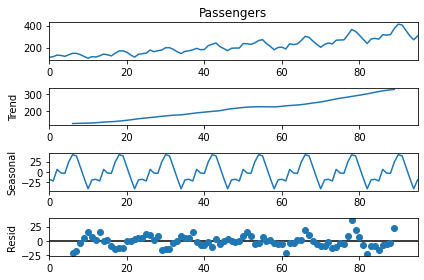

In [9]:
###Time series decomposition plot

decompose_ts_add = seasonal_decompose(air.Passengers,freq=12)
decompose_ts_add.plot()
plt.show() 

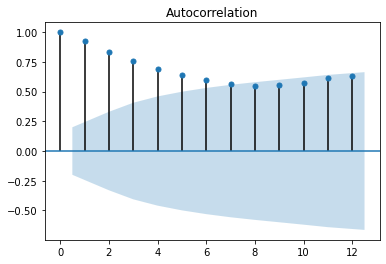

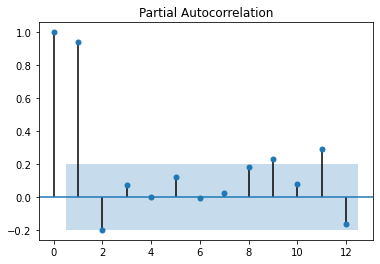

In [10]:
### Acf plots and pacf plots

import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(air.Passengers,lags=12)
tsa_plots.plot_pacf(air.Passengers,lags=12)
plt.show()

In [11]:
###Evaluation metric mape####
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [12]:
###Simple exponential method####
Train["Passengers"] = Train["Passengers"].astype('double') 
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)   

11.652581888339869

In [13]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

9.843474829332123

In [14]:
##Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

C:\Users\SAI HARI\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


2.0386338844629677

In [15]:
##Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

1.1859949063167516

In [16]:
###Final Model by combining train and test
air["Passengers"] = air["Passengers"].astype('double')
hwe_model_mul_add = ExponentialSmoothing(air["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [17]:
##Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)    

96     312.898907
97     308.174709
98     355.538914
99     345.779055
100    345.706928
101    392.485369
102    436.518163
103    429.875723
104    380.189924
105    332.333352
dtype: float64